# Data Set Information:

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months). 
Notes: 
1. (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3. 
2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.


# Attribute Information:

1. date: Date in format dd/mm/yyyy 
2. time: time in format hh:mm:ss 
3. global_active_power: household global minute-averaged active power (in kilowatt) 
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt) 
5. voltage: minute-averaged voltage (in volt) 
6. global_intensity: household global minute-averaged current intensity (in ampere) 
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner. 

In [0]:
import numpy as np
import pandas as pd


In [8]:
! git clone https://github.com/prince-tyagi1997/ML_datasets

Cloning into 'ML_datasets'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [12]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [14]:
data=pd.read_csv('gdrive/My Drive/household_power_consumption.txt',sep=';',header=None)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
data.shape

(2075260, 9)

In [16]:
data.head()

,0,1,2,3,4,5,6,7,8
0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
2,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
3,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
4,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000


In [17]:
data.describe()

,0,1,2,3,4,5,6,7,8
count,2075260,2075260,2075260,2075260,2075260,2075260,2075260,2075260,2049281.0
unique,1443,1441,6535,897,5169,378,154,146,54.0
top,8/6/2009,18:49:00,?,0.000,?,1.000,0.000,0.000,0.0
freq,1440,1442,25979,472785,25979,169406,1840610,1408273,813979.0


In [18]:
columns=data.iloc[0,:]
data.columns=columns
data.drop(data.index[0],inplace=True)
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
2,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
3,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
4,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
5,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


In [0]:
data.replace('?',0,inplace=True)
data[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]=data[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']].astype(float)


In [0]:
consumption=data['Global_active_power']*(1000/60) - data['Sub_metering_1'] - data['Sub_metering_2'] - data['Sub_metering_3']
data['consumption']=consumption

In [0]:
data.drop(columns=['Global_active_power','Global_reactive_power','Sub_metering_1','Sub_metering_2','Sub_metering_3'],inplace=True)

In [22]:
data.head()

,Date,Time,Voltage,Global_intensity,consumption
1,16/12/2006,17:24:00,234.84,18.4,52.266667
2,16/12/2006,17:25:00,233.63,23.0,72.333333
3,16/12/2006,17:26:00,233.29,23.0,70.566667
4,16/12/2006,17:27:00,233.74,23.0,71.800000
5,16/12/2006,17:28:00,235.68,15.8,43.100000


In [0]:
data['Date'] = pd.to_datetime(data['Date'])
data['year'], data['month'] = data['Date'].dt.year, data['Date'].dt.month


In [0]:
year=data[['year','consumption']]
yr_sum=[]
for yr in set(year['year']) :
    y=[]
    y=[yr,(year[year['year']==yr]['consumption'].sum())]
    yr_sum.append(y)
yr_sum=pd.DataFrame(yr_sum,columns=['year','consumption'])

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

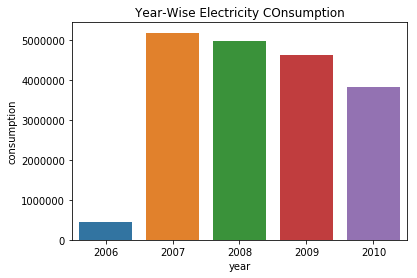

In [26]:
sns.barplot(x='year',y='consumption',data=yr_sum)
plt.title('Year-Wise Electricity COnsumption')
plt.show()

In [0]:
month=data[['month','consumption']]
mon_sum=[]
for mon in set(month['month']) :
    y=[]
    y=[mon,(month[month['month']==mon]['consumption'].sum())]
    mon_sum.append(y)
mon_sum=pd.DataFrame(mon_sum,columns=['month','consumption'])

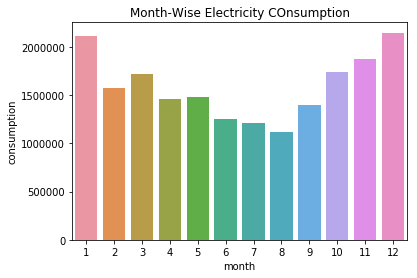

In [28]:
sns.barplot(x='month',y='consumption',data=mon_sum)
plt.title('Month-Wise Electricity COnsumption')
plt.show()

In [0]:
data['Hour']=data['Time'].str.slice(0,2)
data['hourminute']=data['Time'].str.slice(0,2)+data['Time'].str.slice(3,5)

In [0]:
hour=data[['Hour','consumption']]
hour_sum=[]
for ho in set(hour['Hour']) :
    y=[]
    y=[ho,(hour[hour['Hour']==ho]['consumption'].sum())]
    hour_sum.append(y)
hour_sum=pd.DataFrame(hour_sum,columns=['Hour','consumption'])

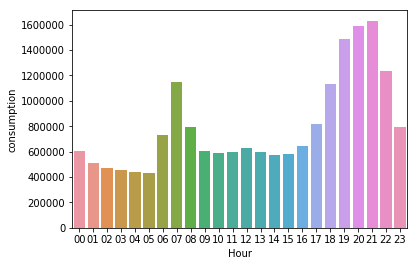

In [31]:
sns.barplot(x='Hour',y='consumption',data=hour_sum)
plt.show()

In [32]:
''''morning=5-11(till 11:59:59)
afternoon=12-16(till 16:59:59)
evening=17-20( till 20:59:59)
night=21-4(till 4:59:59 )
'''
timesplit={
'morning':['05','06','07','08','9','10','11'],
'afternoon':['12','13','14','15','16'],
'evening':['17','18','19','20'],
'night':['21','22','23','00','01','02','03','04']
}
timesplit.keys()

dict_keys(['morning', 'afternoon', 'evening', 'night'])

In [0]:
timeofday=[]
for key in timesplit.keys():
    tm=[]
    tm=[key,data[data['Hour'].isin(timesplit[key])]['consumption'].sum()]
    timeofday.append(tm)
timeofday=pd.DataFrame(timeofday,columns=['timeofday','consumption'])

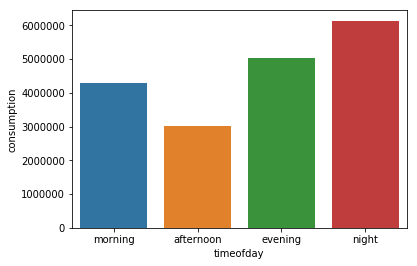

In [34]:
sns.barplot(x='timeofday',y='consumption',data=timeofday)
plt.show()

# Forecasting Electrical Consumption in a Household
I am going to train a Neural Network based on these two features i.e. time of day(hour) and month of the year.


In [94]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
df=clean_dataset(data[['Hour','month','consumption']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
X=df[['Hour','month']]
Y=df['consumption']
Y=np.array(Y,dtype=float)
X=np.array(X,dtype=float)


In [96]:
len(X),len(Y)

(2049280, 2049280)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.optimizers import Adam
from keras.models import Model

In [0]:
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=13, input_dim=2,activation="relu"))
    regressor.add(Dense(units=8,activation="relu"))
    regressor.add(Dense(units=4,activation="relu"))
    regressor.add(Dense(units=4,activation="relu"))
    regressor.add(Dense(units=1,activation="linear"))
    opt = Adam(lr=1e-3, decay=1e-3 / 200)
    regressor.compile(loss="mean_absolute_percentage_error", optimizer=opt)
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

In [0]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=100)

In [112]:
results=regressor.fit(X_train,y_train)
y_pred= regressor.predict(X_test)



Epoch 1/100
1434496/1434496 [==============================] - 47s 33us/step - loss: 80.8225 - mean_absolute_error: 5.9277 - acc: 0.0019
Epoch 2/100
1434496/1434496 [==============================] - 46s 32us/step - loss: 77.1586 - mean_absolute_error: 5.7247 - acc: 0.0023
Epoch 3/100
1434496/1434496 [==============================] - 46s 32us/step - loss: 76.3168 - mean_absolute_error: 5.6806 - acc: 0.0025
Epoch 4/100
1434496/1434496 [==============================] - 46s 32us/step - loss: 76.2015 - mean_absolute_error: 5.6818 - acc: 0.0024
Epoch 5/100
1434496/1434496 [==============================] - 45s 32us/step - loss: 76.0324 - mean_absolute_error: 5.6801 - acc: 0.0024
Epoch 6/100
1434496/1434496 [==============================] - 45s 32us/step - loss: 75.1438 - mean_absolute_error: 5.6369 - acc: 0.0025
Epoch 7/100
1434496/1434496 [==============================] - 45s 31us/step - loss: 73.8198 - mean_absolute_error: 5.5901 - acc: 0.0025
Epoch 8/100
1434496/1434496 [============

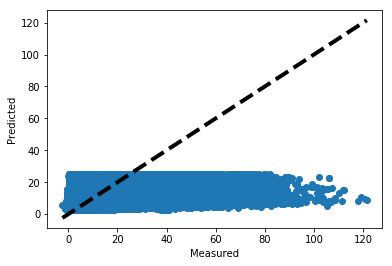

In [113]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [114]:
y_test[:5],y_pred[:5]

(array([ 6.16666667,  8.93333333,  3.53333333, 22.63333333,  1.4       ]),
 array([ 7.460497 , 13.983513 ,  4.482464 , 13.983513 ,  3.9012299],
       dtype=float32))